# Houses Kaggle Competition (revisited with Deep Learning 🔥) 

[<img src='https://wagon-public-datasets.s3.amazonaws.com/data-science-images/ML/kaggle-batch-challenge.png' width=600>](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

⚙️ Let's re-use our previous **pipeline** built in the module **`05-07-Ensemble-Methods`** and try to improve our final predictions with a Neural Network!

## (0) Libraries and imports

In [1]:
%load_ext autoreload
%autoreload 2

# DATA MANIPULATION
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# DATA VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns

# VIEWING OPTIONS IN THE NOTEBOOK
from sklearn import set_config; set_config(display='diagram')

## (1) 🚀 Getting Started

### (1.1) Load the datasets

💾 Let's load our **training dataset**

In [2]:
data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/houses_train_raw.csv")
X = data.drop(columns='SalePrice')
y = data['SalePrice']

In [3]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [4]:
X.shape, y.shape

((1460, 80), (1460,))

💾 Let's also load the **test set**

❗️ Remember ❗️ You have access to `X_test` but only Kaggle has `y_test`

In [5]:
X_test = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/houses_test_raw.csv")

In [6]:
X_test.shape

(1459, 80)

### (1.2) Train/Val Split

❓ **Holdout** ❓ 

As you are not allowed to use the test set (and you don't have access to `y_test` anyway), split your dataset into a training set and a validation set.

In [8]:
from sklearn.model_selection import train_test_split

# Split the dataset: 80% for training, 20% for validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=1  # Ensures reproducibility
)


### (1.3) Import the preprocessor

🎁 You will find in `utils/preprocessor.py` the **`data-preprocessing pipeline`** that was built in our previous iteration.

❓ Run the cell below, and make sure you understand what the pipeline does. Look at the code in `preprocessor.py` ❓

In [9]:
from utils.preprocessor import create_preproc

preproc = create_preproc(X_train)
preproc

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical_encoder',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['1stFlrSF', '2ndFlrSF',
                                                   '3SsnPorch', 'BedroomAbvGr',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'BsmtUnfSF',
                                                   'EnclosedPorch',
                                                   'Fireplaces', 'FullBath',
                                                   'GarageArea', 'GarageCars...
                                                   'CentralAir', 'Condition1',
                                                   'Condition2', 'Exterior1st',
                                                   'Exterior2nd', 'Foundation',
                                                   'GarageType', 'Heating',
                                                   'HouseStyle', 'LotConfig',
                                                   'MSZoning', 'MasVnrType',
                                                   'MiscFeature',
                                                   'Neighborhood', 'RoofMatl',
                                                   'RoofStyle', 'SaleCondition',
                                                   'SaleType', 'Street',
                                                   'Utilities'])])),
                ('selectpercentile',
                 SelectPercentile(percentile=75,
                                  score_func=<function mutual_info_regression at 0x7f144f44c5e0>))])

❓ **Scaling your numerical features and encoding the categorical features** ❓

Apply these transformations to _both_ your training set and your validation set.

In [11]:
preproc.fit(X_train, y_train)

X_train_preprocessed = preproc.transform(X_train)
X_val_preprocessed = preproc.transform(X_val)


## (2) 🔮 Your predictions in Tensorflow/Keras

🚀 This is your first **regression** task with Keras! 

💡 Here a few tips to get started:
- Kaggle's [rule](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation) requires to minimize **`rmsle`** (Root Mean Square Log Error). 
    - As you can see, we can specify `msle` directly as a loss-function with Tensorflow.Keras!
    - Just remember to take the square-root of your loss results to read your rmsle metric.
    
    
😃 The best boosted-tree ***rmsle*** score to beat is around ***0.13***

---

<img src="https://i.pinimg.com/564x/4c/fe/ef/4cfeef34af09973211f584e8307b433c.jpg" alt="`Impossible mission" style="height: 300px; width:500px;"/>

---


❓ **Your mission, should you choose to accept it:** ❓
- 💪 Beat the best boosted-tree 💪 

    - Your responsibilities are:
        - to build the ***best neural network architecture*** possible,
        - and to control the number of epochs to ***avoid overfitting***.

### (2.1) Predicting the houses' prices using a Neural Network

❓ **Preliminary Question: Initializing a Neural Network** ❓

Create a function `initialize_model` which initializes a Dense Neural network:
- You are responsible for designing the architecture (number of layers, number of neurons)
- The function should also compile the model with the following parameters:
    - ***optimizer = "adam"***
    - ***loss = "msle"*** (_Optimizing directly for the Squared Log Error!_)
        

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

def initialize_model(input_dim):
    model = Sequential()

    # Input layer (you must pass input_dim)
    model.add(Input(shape=(input_dim,)))

    # Hidden layers (you can tweak these)
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))

    # Output layer: 1 neuron for regression
    model.add(Dense(1, activation='linear'))

    # Compile the model with specified optimizer and loss
    model.compile(optimizer='adam', loss='msle', metrics=['mae'])

    return model


2025-05-19 16:04:01.228336: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-19 16:04:01.372072: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-19 16:04:01.509701: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747663441.621922   18316 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747663441.650034   18316 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747663441.891322   18316 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

❓ **Questions/Guidance** ❓

1. Initialize a Neural Network
2. Train it
3. Evaluate its performance
4. Is the model overfitting the dataset? 

In [13]:
model = initialize_model(X_train_preprocessed.shape[1])


E0000 00:00:1747663490.325438   18316 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1747663490.326054   18316 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [14]:
from tensorflow.keras.callbacks import EarlyStopping

# Optional: early stopping to prevent overfitting
early_stop = EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(
    X_train_preprocessed,
    y_train,
    validation_data=(X_val_preprocessed, y_val),
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 125.7297 - mae: 183845.5625 - val_loss: 78.7985 - val_mae: 175750.9531
Epoch 2/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 71.7724 - mae: 183787.9688 - val_loss: 53.7244 - val_mae: 175667.0000
Epoch 3/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 50.6201 - mae: 183866.9688 - val_loss: 40.7790 - val_mae: 175499.2969
Epoch 4/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 38.7142 - mae: 178958.7969 - val_loss: 32.4224 - val_mae: 175225.1562
Epoch 5/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 31.2661 - mae: 182093.8594 - val_loss: 26.6047 - val_mae: 174835.1875
Epoch 6/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 25.9149 - mae: 184105.1094 - val_loss: 22.3562 - val_mae: 174330.0000
Epoch 7/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 21.7418 - mae: 179017.8125 - val_loss: 19.1054 - val_mae: 173708.1719
Epoch 8/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18.5867 - mae: 176352.6562 - val_los

In [15]:
# Evaluate on validation set
val_loss, val_mae = model.evaluate(X_val_preprocessed, y_val)
print(f"Validation MSLE: {val_loss:.4f}")
print(f"Validation MAE: {val_mae:.2f}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0460 - mae: 30271.4766 
Validation MSLE: 0.0484
Validation MAE: 29778.53


In [16]:
train_loss, train_mae = model.evaluate(X_train_preprocessed, y_train)
print(f"Train MSLE: {train_loss:.4f}")
print(f"Train MAE: {train_mae:.2f}")
    

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0457 - mae: 29879.7461 
Train MSLE: 0.0439
Train MAE: 29810.21


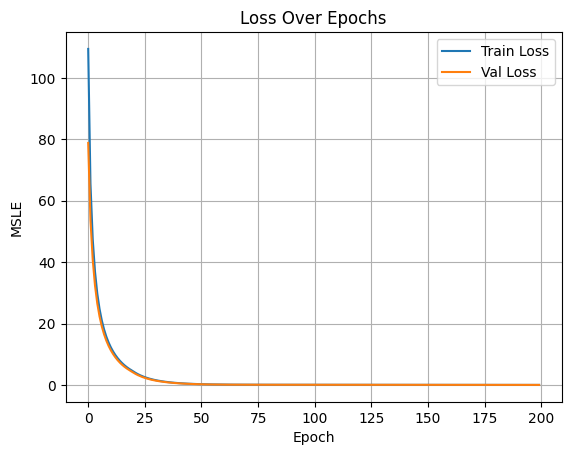

In [17]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title("Loss Over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("MSLE")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_loss(history)


🎁 We coded a `plot_history` function that you can use to detect overfitting

In [18]:
def plot_history(history):
    plt.plot(np.sqrt(history.history['loss']))
    plt.plot(np.sqrt(history.history['val_loss']))
    plt.title('Model Loss')
    plt.ylabel('RMSLE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='best')
    plt.show()

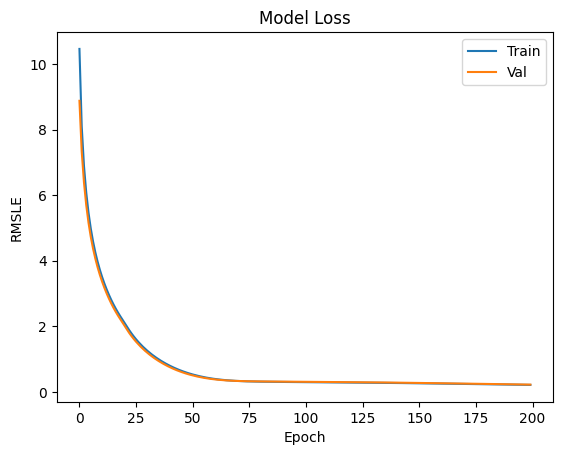

In [19]:
plot_history(history)

### (2.2) Challenging yourself

🤔 **Questions to challenge yourself:**
- Are you satisfied with your score?
- Before publishing it, ask yourself whether you could really trust it or not?
- Have you cross-validated your neural network? 
    - Feel free to cross-validate it manually with a *for loop* in Python to make sure that your results are robust against the randomness of a _train-val split_ before before submitting to Kaggle

❓ Create a function `evaluate_model` following the framework below 👇 then use a for loop with `KFold` to manually cross validate your model!

In [22]:
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import EarlyStopping

def evaluate_model(X, y, train_index, val_index):
    # Split data
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Create preprocessor only with X_train
    preproc = create_preproc(X_train)

    # Fit preproc on train with y_train, transform train and val
    X_train_prep = preproc.fit_transform(X_train, y_train)
    X_val_prep = preproc.transform(X_val)

    # Initialize model (pass input dim if needed)
    model = initialize_model(X_train_prep.shape[1])

    # Train model with early stopping
    early_stop = EarlyStopping(patience=10, restore_best_weights=True)
    history = model.fit(
        X_train_prep, y_train,
        validation_data=(X_val_prep, y_val),
        epochs=200,
        batch_size=32,
        verbose=0,
        callbacks=[early_stop]
    )

    # Predict and evaluate
    y_pred = model.predict(X_val_prep).flatten()
    rmsle_final = np.sqrt(mean_squared_log_error(y_val, y_pred))
    rmsle_min = np.sqrt(min(history.history['val_loss']))

    return pd.DataFrame({
        'rmsle_final_epoch': [rmsle_final],
        'rmsle_min': [rmsle_min]
    })


In [23]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
results = pd.DataFrame()

for fold, (train_idx, val_idx) in enumerate(kfold.split(X, y), 1):
    print(f"Evaluating fold {fold}...")
    fold_result = evaluate_model(X, y, train_idx, val_idx)
    results = pd.concat([results, fold_result], ignore_index=True)

# Summary statistics
print("\nAverage RMSLE over folds:")
print(results.mean())


Evaluating fold 1...
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Evaluating fold 2...
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Evaluating fold 3...
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Evaluating fold 4...
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Evaluating fold 5...
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

Average RMSLE over folds:
rmsle_final_epoch    5.077376
rmsle_min            4.925709
dtype: float64


### (2.3) (Bonus) Using all your CPU cores to run Neural Networks

🔥 **BONUS** 🔥 **Multiprocessing computing using [dask](https://docs.dask.org/en/latest/delayed.html)** and **all your CPU cores**:

_(to mimic SkLearn's `n_jobs=-1`)_

In [ ]:
!pip install --quiet dask

In [ ]:
from sklearn.model_selection import KFold
from dask import delayed

# cv = 5
# kf = KFold(n_splits = cv, shuffle = True)
# f = delayed(evaluate_model)

# results = delayed([f(X, y, train_index, val_index) for (train_index, val_index) in kf.split(X)
#                   ]).compute(
#                       scheduler='processes', num_workers=8)

# pd.concat(results, axis=0).reset_index(drop=True)

### (2.4) (Bonus) Multiprocessing with Python


**multiprocessing with default Python library**

References :
* [Yitong Ren - Speeding Up and Perfecting Your Work Using Parallel Computing](https://medium.com/towards-data-science/speeding-up-and-perfecting-your-work-using-parallel-computing-8bc2f0c073f8)
* [Johaupt Github - Parallel Processing for Cross Validation](https://johaupt.github.io/blog/multiprocessing_cross_validation.html)

In [ ]:
# This code will fail try to debug it yourself if you cannot checkout the hints below
import multiprocessing as mp
pool = mp.Pool(processes=2) #mp.cpu_count()-1)

results = []
def log_result(x):
    results.append(x)

for train_index, val_index in kf.split(X):
    pool.apply_async(
        evaluate_model,
        args=(X, y, train_index, val_index),
        callback=log_result)

# Close the pool for new tasks
pool.close()

# Wait for all tasks to complete at this point
pool.join()

result = pd.concat(results, axis=0)

<details>
    <summary markdown='span'>Hints</summary>

This is a limitation of multiprocessing in ipython enviroments this code would work fine in .py file.
The key error is `AttributeError: Can't get attribute 'evaluate_model' on <module 'main' (built-in)>`

Checkout this stackoverflow for a workaround https://stackoverflow.com/questions/41385708/multiprocessing-example-giving-attributeerror !
</details>

## (3) 🏅FINAL SUBMISSION

🦄 Predict the ***prices of the houses in your test set*** and submit your results to Kaggle! 



In [ ]:
# X_test = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/houses_test_raw.csv")
# X_test_preproc = preproc.transform(X_test)
# ALREADY DONE ABOVE

In [ ]:
# YOUR CODE HERE

💾 Save your predictions in a Dataframe called `results` with the format required by Kaggle so that when you export it to a `.csv`, Kaggle can read it.

In [ ]:
# YOUR CODE HERE

📤  Export your results using Kaggle's submission format and submit it online!

_(Uncomment the last cell of this notebook)_

In [ ]:
# results.to_csv("submission_final.csv", header=True, index=False)

---

🏁 Congratulations!

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... it's time for the Recap!